Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 6         
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None
Comenzando entrenamiento...
Modelo entrenado!
1/1 [==============================] - 0s 130ms/step
El resultado es [[75.1033]] fahrenheit!
Variables internas del modelo
[array([[-0.04388817,  0.12193496, -0.47733098]], dtype=float32), array([-2.8839722,  1.9260315, -3.2436798], dtype=float32)]
[array([[-0.4267486 ,  0

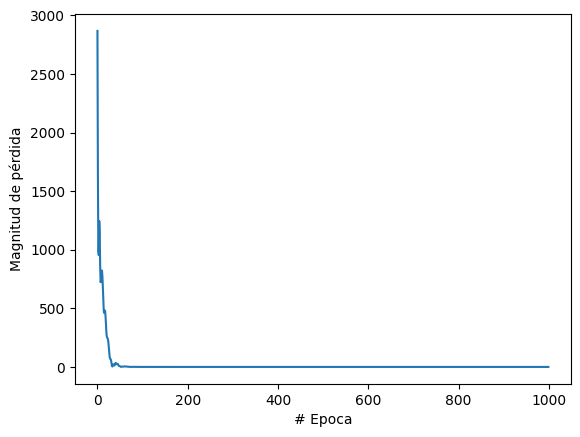

In [1]:
# Ejemplo 1: Transformación de grados Celsius a Fahrenheit

#  importamos las clases que utilizaremos
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense
import matplotlib.pyplot as plt

# creamos los arrays de entrada y salida.
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

# Creación del modelo de red neuronal
oculta1 = Dense(3, input_shape=[1]) #Parámetros: 3(neuronas)*1(dimensiones) + 3 (sesgo) = 6
oculta2 = Dense(3) # 3(neuronas)*3(neuronas capa anterior) + 3 (sesgo) = 12
salida = Dense(1) # 1(neurona)*3(neuronas capa anterior) + 1 (sesgo) = 4
model = Sequential([oculta1, oculta2, salida])

# printamos el resumen del modelo de red neuronal
print(model.summary())

# Con compile podemos ajustar nuestro modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

# entrenaremos la red recibiendo por parámetro los arrays de entrada y salida, así como el número de iteraciones de aprendizaje (epochs) de entrenamiento
print("Comenzando entrenamiento...")
historial = model.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

# mostramos gráficamente el resultado del entrenamiento
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

# evaluamos el modelo
scores = model.evaluate(celsius, fahrenheit)

#probamos a hacer una predicción
resultado = model.predict([24.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())